## Analysis of Global Property Price Trends

#### Andrew Zou <br> Email: andrew.zou@stern.nyu.edu

This project seeks to examine trends in property prices over the last decade. The data comes from [Bank for International Settlements](https://www.bis.org/).

The outputs for the project are 

- two bar charts ranking the countries by the greatest percent change in property prices over the last five and ten years
- three heatmaps showing trends over the last ten years, and the last two five year periods.

---

In [785]:
import pandas as pd #importing the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from descartes.patch import PolygonPatch # returned error if did not use descartes package

import geopandas as gpd 
from shapely.geometry import Point, Polygon
from IPython.display import display, Image

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

The data comes from the BIS website. The excel file contains several property price series for over 60 countries. 

In [786]:
selected_df = pd.read_excel('https://www.bis.org/statistics/pp/pp_selected.xlsx',sheet_name = 'Quarterly Series') #reading in data

In [787]:
selected_df.head()

,Back to menu,"Residential property prices selected - Nominal - Index, 2010 = 100","Residential property prices selected - Nominal - Year-on-year changes, in per cent","Residential property prices selected - Real - Index, 2010 = 100","Residential property prices selected - Real - Year-on-year changes, in per cent","Residential property prices selected - Nominal - Index, 2010 = 100.1","Residential property prices selected - Nominal - Year-on-year changes, in per cent.1","Residential property prices selected - Real - Index, 2010 = 100.1","Residential property prices selected - Real - Year-on-year changes, in per cent.1","Residential property prices selected - Nominal - Index, 2010 = 100.2",...,"Residential property prices selected - Real - Index, 2010 = 100.58","Residential property prices selected - Real - Year-on-year changes, in per cent.58","Residential property prices selected - Nominal - Index, 2010 = 100.59","Residential property prices selected - Nominal - Year-on-year changes, in per cent.59","Residential property prices selected - Real - Index, 2010 = 100.59","Residential property prices selected - Real - Year-on-year changes, in per cent.59","Residential property prices selected - Nominal - Index, 2010 = 100.60","Residential property prices selected - Nominal - Year-on-year changes, in per cent.60","Residential property prices selected - Real - Index, 2010 = 100.60","Residential property prices selected - Real - Year-on-year changes, in per cent.60"
0,NaN,"Index, 2010 = 100 (-)","Year-on-year changes, in per cent (-)","Index, 2010 = 100 (-)","Year-on-year changes, in per cent (-)","Index, 2010 = 100 (-)","Year-on-year changes, in per cent (-)","Index, 2010 = 100 (-)","Year-on-year changes, in per cent (-)","Index, 2010 = 100 (-)",...,"Index, 2010 = 100 (-)","Year-on-year changes, in per cent (-)","Index, 2010 = 100 (-)","Year-on-year changes, in per cent (-)","Index, 2010 = 100 (-)","Year-on-year changes, in per cent (-)","Index, 2010 = 100 (-)","Year-on-year changes, in per cent (-)","Index, 2010 = 100 (-)","Year-on-year changes, in per cent (-)"
1,NaN,Emerging markets (aggregate),Emerging markets (aggregate),Emerging markets (aggregate),Emerging markets (aggregate),Advanced economies (aggregate),Advanced economies (aggregate),Advanced economies (aggregate),Advanced economies (aggregate),United Arab Emirates,...,United States,United States,Euro area,Euro area,Euro area,Euro area,South Africa,South Africa,South Africa,South Africa
2,Period,Q:4T:N:628,Q:4T:N:771,Q:4T:R:628,Q:4T:R:771,Q:5R:N:628,Q:5R:N:771,Q:5R:R:628,Q:5R:R:771,Q:AE:N:628,...,Q:US:R:628,Q:US:R:771,Q:XM:N:628,Q:XM:N:771,Q:XM:R:628,Q:XM:R:771,Q:ZA:N:628,Q:ZA:N:771,Q:ZA:R:628,Q:ZA:R:771
3,1966-03-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.95,NaN,49.13,NaN
4,1966-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.97,NaN,49.72,NaN


As you can see, the data set contained a number of different series for each country. For my analysis, I wanted only the real, indexed series. The first 4 rows of the dataframe were also extremely messy, so I had to do some cleaning.

In [788]:
ind_real_df = pd.DataFrame() ##extracting only the real indexed series
for i in selected_df.columns:
    if 'Real' in i:
        if 'Index' in i:
            ind_real_df[i] = selected_df[i]

In [789]:
ind_real_df['date'] = selected_df['Back to menu'] #adding date column to new dataframe

In [790]:
ind_real_df.set_index(ind_real_df['date'], inplace = True) # setting column date as index

In [791]:
ind_real_df.drop('Period', inplace = True) #removing useless metadata

In [792]:
test_real_df = ind_real_df.iloc[1:] # cleaning top rows, couldn't drop rows that were named NaN
test_real_df.drop(['date'], axis = 1, inplace = True)

In [793]:
countrylist = test_real_df.iloc[0].tolist()

In [794]:
test_real_df.columns = countrylist #renaming columns as just country name

In [795]:
clean_real_df = test_real_df.iloc[1:] #deleted first row, couldn't use .drop()

In [796]:
yoy_real_df = clean_real_df.pct_change(4) #year over year percent change

I plotted all of the year-over-year data in order to get a better sense of the back history of the data and to make sure the percent change calculations were not affected by the NaN values.

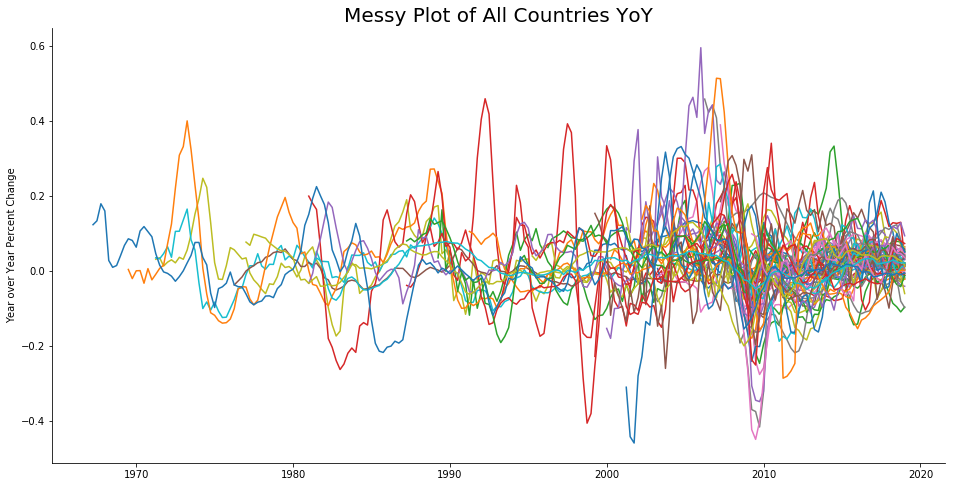

In [797]:
fig, ax = plt.subplots(figsize =(16,8))

ax.set_title('Messy Plot of All Countries YoY', fontsize = 20)
ax.set_ylabel("Year over Year Percent Change")

ax.plot(yoy_real_df)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

Below, I calculated percent change for five  years, ten years, and 15 years.

In [798]:
fiveyoy_real_df = clean_real_df.pct_change(20)
tenyoy_real_df = clean_real_df.pct_change(40)
fiftyoy_real_df = clean_real_df.pct_change(60)

I plotted the five year data again to ensure that there were no weird calculations resulting from NaN values. I was able to ensure that these lines began 5 years after the 1 YoY lines did.

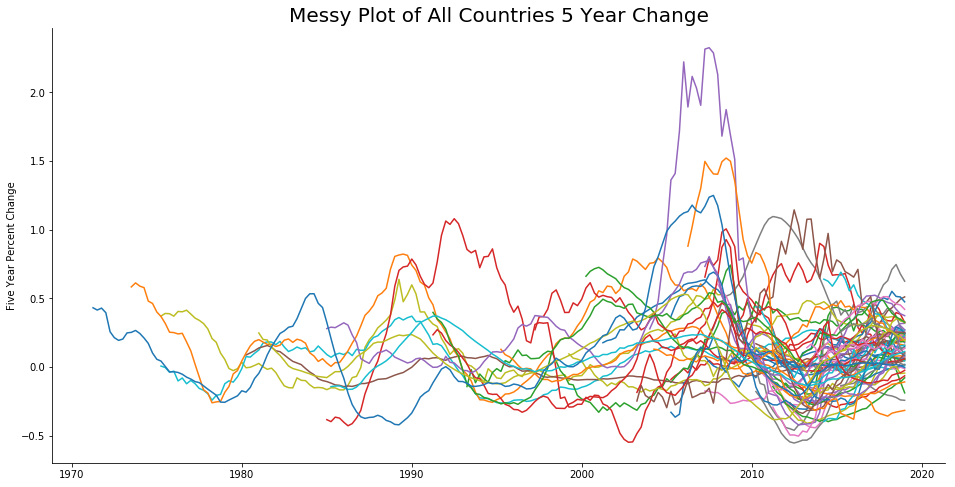

In [799]:
fig, ax = plt.subplots(figsize =(16,8))

ax.set_title('Messy Plot of All Countries 5 Year Change', fontsize = 20)
ax.set_ylabel("Five Year Percent Change")

ax.plot(fiveyoy_real_df)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

There were a few series that were aggregates. I took them out of the dataframes below. While selecting a single row from each of the three dataframes I created. This was just for ease. The extracted rows became series objects, with country name as the index and a single column of percent change values.

In [800]:
last_five_yrs_df = fiveyoy_real_df.iloc[-1].drop(['Euro area','Emerging markets (aggregate)', 'Advanced economies (aggregate)'])
last_ten_yrs_df = tenyoy_real_df.iloc[-1].drop(['Euro area','Emerging markets (aggregate)', 'Advanced economies (aggregate)'])
last_fift_yrs_df = twenyoy_real_df.iloc[-1].drop(['Euro area','Emerging markets (aggregate)', 'Advanced economies (aggregate)'])
# cleaning

I sorted the dataframes.

In [801]:
last_five_yrs_df.sort_values(inplace = True) #most recent five years
# could not sort_values by = index[-1] because by only takes a string

last_ten_yrs_df.sort_values(inplace = True)
last_fift_yrs_df.sort_values(inplace = True) # didn't use, not enough data

Below is the plot ranking each country in the dataframe by five year percent change in property prices. 

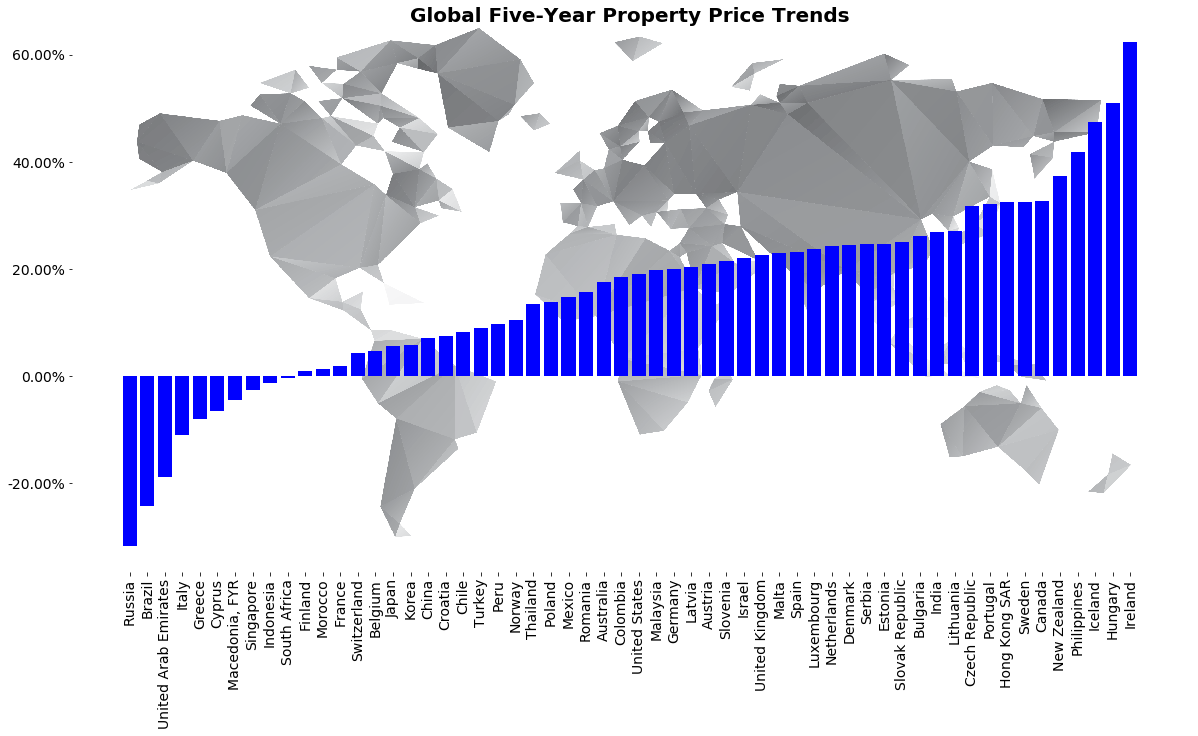

In [802]:
fig, ax = plt.subplots(figsize =(20,10))

ax.set_title('Global Five-Year Property Price Trends', fontsize = 20, fontweight = "bold")

plt.xticks(rotation ='vertical', size = 14)
plt.yticks(size = 14)

a = plt.imread('https://s3.amazonaws.com/peoplepng/wp-content/uploads/2018/12/09224438/World-Map-High-Quality-PNG.png')
ax.imshow(a, extent = [0, 57, -0.3, 0.65], aspect = 'auto')

ax.bar(last_five_yrs_df.index, last_five_yrs_df, color = 'b')

pct = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in pct])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


#plt.savefig('5_year_bar.png', bbox_inches="tight", dpi = 600)

plt.show()

In [803]:
last_ten_yrs_df.drop(['Romania', 'Poland', 'India', 'Turkey'], inplace = True) # no data

Below is the plot ranking each country by largest percent change over 10 years.

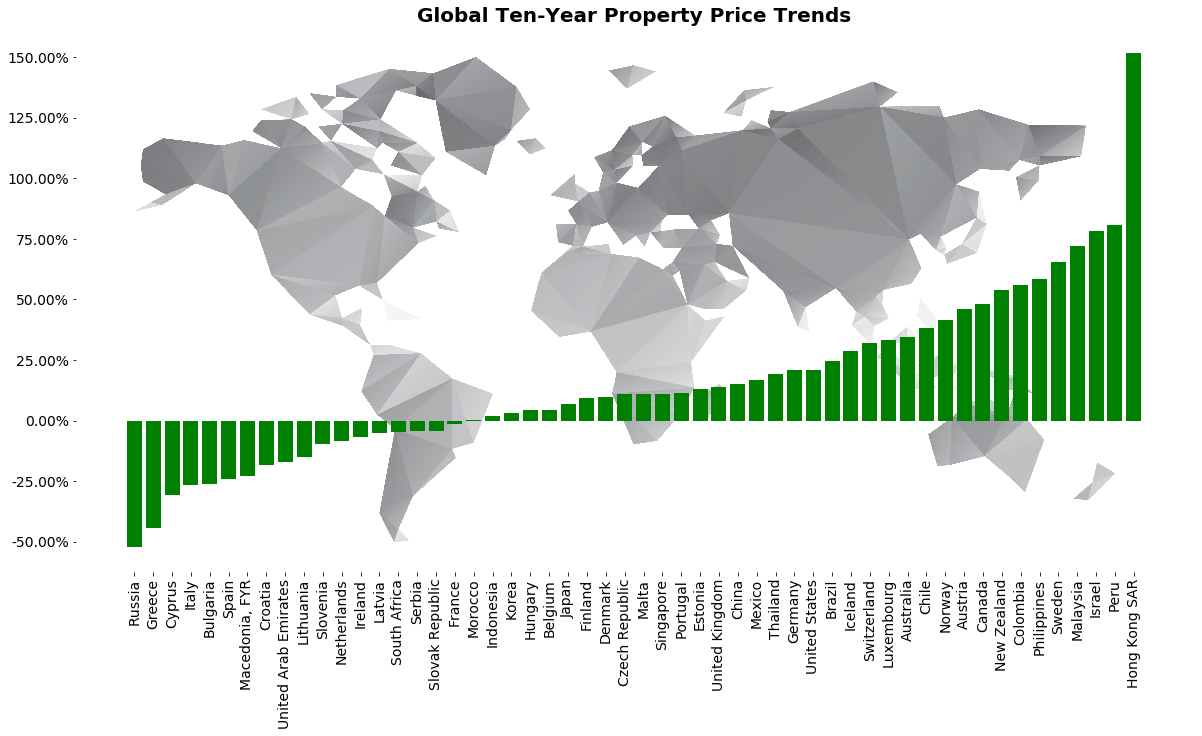

In [804]:
fig, ax = plt.subplots(figsize =(20,10))

ax.set_title('Global Ten-Year Property Price Trends', fontsize = 20, fontweight = "bold")

a = plt.imread('https://s3.amazonaws.com/peoplepng/wp-content/uploads/2018/12/09224438/World-Map-High-Quality-PNG.png')
ax.imshow(a, extent = [0, 52, -0.5, 1.5], aspect = 'auto')

plt.xticks(rotation ='vertical', size = 14)
plt.yticks(size = 14)

ax.bar(last_ten_yrs_df.index, last_ten_yrs_df, color = 'g')

pct1 = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in pct1])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#plt.savefig('10_year_bar.png', bbox_inches="tight", dpi = 600)
               
plt.show()

In order to create the heat map, I had to make sure that the countries were written exactly the same my dataframes as the naturalearth_lowres dataframe. A few countries in the BIS data did not exist in the naturalearth_lowres dataframe, so I dropped them. Other countries were spelled slightly differently, so I changed them manually.

In [805]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
countrylist_map = world['name'].tolist() #country lists
fiveyoylist = last_five_yrs_df.index.tolist()
tenyoylist = last_ten_yrs_df.index.tolist()

In [806]:
for i in fiveyoylist: #searching for naming discrepancies
    if i not in countrylist_map:
        print(i)
        
# Singapore, Malta, Hong Kong not in Geopandas map, others are named wrong

Macedonia, FYR
Singapore
Korea
United States
Malta
Slovak Republic
Czech Republic
Hong Kong SAR


In [807]:
map_five_df = last_five_yrs_df.rename(index = {'United States': 'United States of America', 'Korea': 'South Korea', 'Macedonia, FYR': 'Macedonia', 'Slovak Republic': 'Slovakia', 'Czech Republic': 'Czechia'}).drop(['Singapore', 'Malta', 'Hong Kong SAR'])
map_ten_df = last_ten_yrs_df.rename(index = {'United States': 'United States of America', 'Korea': 'South Korea', 'Macedonia, FYR': 'Macedonia', 'Slovak Republic': 'Slovakia', 'Czech Republic': 'Czechia'}).drop(['Singapore', 'Malta', 'Hong Kong SAR'])

In [808]:
world.set_index(['name'], inplace = True)

In [809]:
map_five_df.rename('5year', inplace = True) # renaming because current name is datetime from previous dataframe
map_ten_df.rename('10year', inplace = True)

Russia                     -0.521679
Greece                     -0.444706
Cyprus                     -0.307606
Italy                      -0.264970
Bulgaria                   -0.260084
Spain                      -0.239243
Macedonia                  -0.230129
Croatia                    -0.183891
United Arab Emirates       -0.171293
Lithuania                  -0.150841
Slovenia                   -0.097879
Netherlands                -0.082970
Ireland                    -0.068860
Latvia                     -0.051520
South Africa               -0.048919
Serbia                     -0.043134
Slovakia                   -0.041122
France                     -0.013187
Morocco                     0.002060
Indonesia                   0.020404
South Korea                 0.029720
Hungary                     0.044381
Belgium                     0.044667
Japan                       0.067650
Finland                     0.092854
Denmark                     0.097612
Czechia                     0.108157
P

I joined the worldmap dataframe with the 5-year and 10-year series.

In [810]:
map_df = world.join([map_five_df, map_ten_df])

Below is the heatmap showing property prices over the last 10 years. I had to use two layers of maps in order to account for the countries that I did not have data for. The default for geopandas was to set NaN as the lowest value, making the heatmaps unreadable.

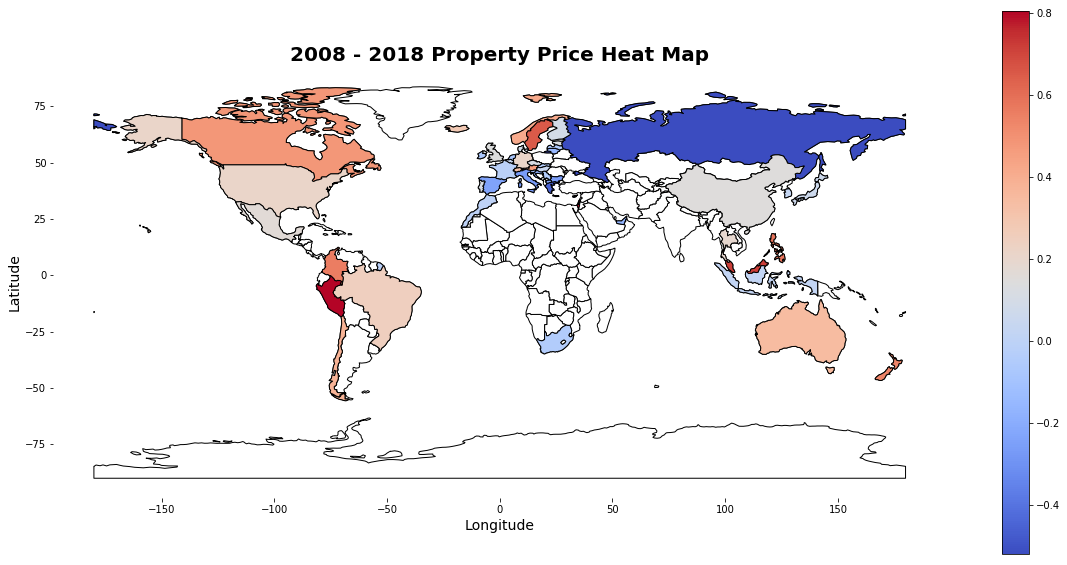

In [811]:
fig, ax = plt.subplots(figsize =(20,10))

ax.set_title('2008 - 2018 Property Price Heat Map', fontsize = 20, fontweight = "bold")

ax.set_xlabel('Longitude', fontsize = 14)
ax.set_ylabel('Latitude', fontsize = 14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

map_df.plot(color = 'white', ax = ax, edgecolor = 'black') # first layer
map_df.dropna().plot(column = '10year', ax = ax, legend = True, cmap = 'coolwarm', edgecolor = 'black')


#plt.savefig('10_year_heatmap.png', bbox_inches="tight", dpi = 600)

Below is the heatmap showing property prices over the last 5 years.

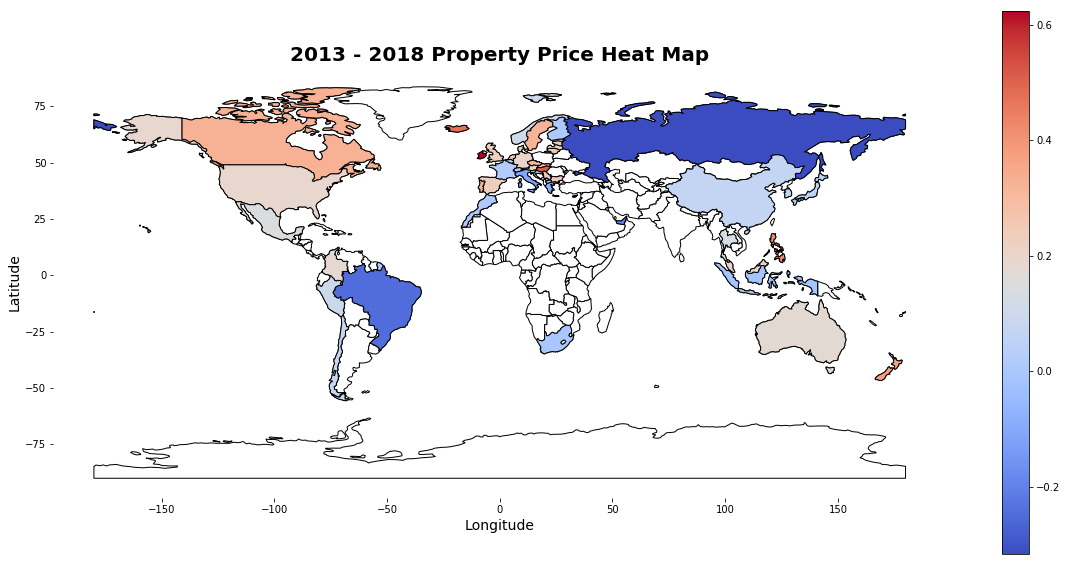

In [812]:
fig, ax = plt.subplots(figsize =(20,10))

ax.set_title('2013 - 2018 Property Price Heat Map', fontsize = 20, fontweight = "bold")

ax.set_xlabel('Longitude', fontsize = 14)
ax.set_ylabel('Latitude', fontsize = 14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

map_df.plot(color = 'white', ax = ax, edgecolor = 'black') # first layer
map_df.dropna().plot(column = '5year', ax = ax, legend = True, cmap = 'coolwarm', edgecolor = 'black')


#plt.savefig('2013_2018_heatmap.png', bbox_inches="tight", dpi = 600)

I decided to go back and make another heatmap using the data for the five year period before the one above. Below, I simply repeated the same steps as before. I dropped unnecessary series, selected a single row, and joined it with the worldmap dataframe.

In [813]:
five_yrs_ago_df = fiveyoy_real_df.iloc[-21].drop(['Euro area','Emerging markets (aggregate)', 'Advanced economies (aggregate)'])
five_yrs_ago_df.drop(['Romania', 'Poland', 'India', 'Turkey'], inplace = True) 

In [814]:
map_2013_df = last_ten_yrs_df.rename(index = {'United States': 'United States of America', 'Korea': 'South Korea', 'Macedonia, FYR': 'Macedonia', 'Slovak Republic': 'Slovakia', 'Czech Republic': 'Czechia'}).drop(['Singapore', 'Malta', 'Hong Kong SAR'])

In [815]:
map_2013_df.rename('2013', inplace = True)
world_final = final_world.join(map_2013_df)

Below is the heatmap of property price trends from 2008 to 2013.

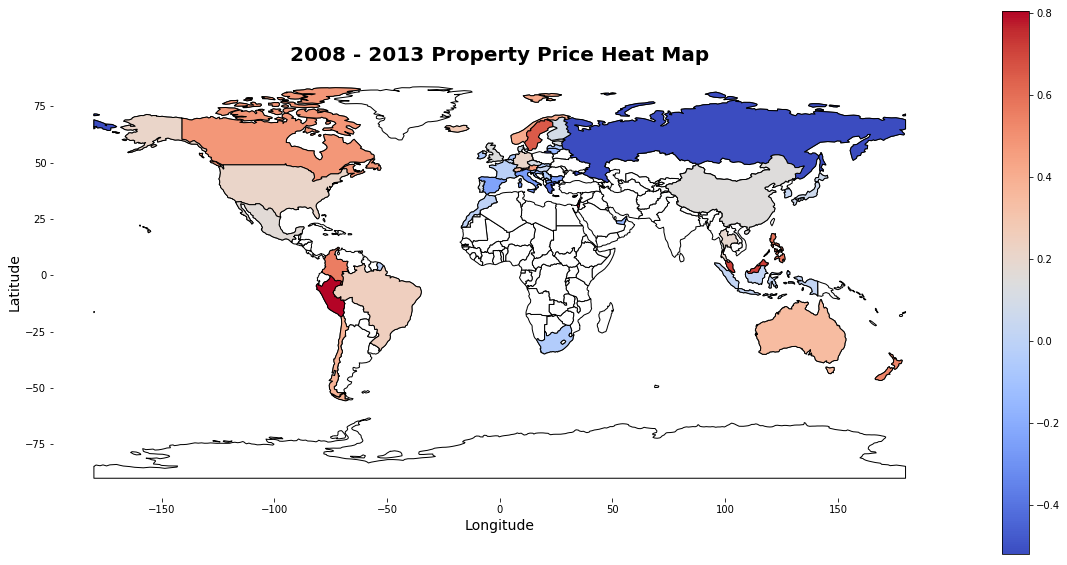

In [816]:
fig, ax = plt.subplots(figsize =(20,10))

ax.set_title('2008 - 2013 Property Price Heat Map', fontsize = 20, fontweight = "bold")

ax.set_xlabel('Longitude', fontsize = 14)
ax.set_ylabel('Latitude', fontsize = 14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

world_final.plot(color = 'white', ax = ax, edgecolor = 'black') # first layer
world_final.dropna().plot(column = '2013', ax = ax, legend = True, cmap = 'coolwarm', edgecolor = 'black')

#plt.savefig('2008_2013_heatmap.png', bbox_inches="tight", dpi = 600)